# FID

In [ ]:
!pip install torch-fidelity
!pip install torchmetrics[image]

In [ ]:
!pip install dlib

In [1]:
!pip install gdown

In [ ]:
!wget -P /kaggle/working/ http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2 # DOWNLOAD LINK

!bunzip2 /kaggle/working/shape_predictor_68_face_landmarks.dat.bz2

In [112]:
!gdown --id '1EsGSnY7KlzDTPA2EDWxQ1ey06kivRr0l' -O "/kaggle/working/model_ir50.pth"

/opt/conda/lib/python3.10/site-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1EsGSnY7KlzDTPA2EDWxQ1ey06kivRr0l
From (redirected): https://drive.google.com/uc?id=1EsGSnY7KlzDTPA2EDWxQ1ey06kivRr0l&confirm=t&uuid=cea1f697-4516-4057-bf7f-95039043cbbf
To: /kaggle/working/model_ir50.pth
100%|█████████████████████████████████████████| 174M/174M [00:00<00:00, 204MB/s]


In [2]:
!gdown --id '1FS2V756j-4kWduGxfir55cMni5mZvBTv' -O "/kaggle/working/model_ir_se50.pth"

/opt/conda/lib/python3.10/site-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1FS2V756j-4kWduGxfir55cMni5mZvBTv
From (redirected): https://drive.google.com/uc?id=1FS2V756j-4kWduGxfir55cMni5mZvBTv&confirm=t&uuid=3f972885-512b-470b-bdca-c47e4c8df31e
To: /kaggle/working/model_ir_se50.pth
100%|████████████████████████████████████████| 175M/175M [00:06<00:00, 27.8MB/s]


## reshape face

In [7]:
import torchvision
import os
import dlib
import numpy as np
import PIL
import scipy
from torchvision import transforms
import shutil
import matplotlib.pyplot as plt
import torch
from torchmetrics.image.fid import FrechetInceptionDistance
from torch import nn

## e4e

In [14]:
def remove_folder(folder_path):
    shutil.rmtree(folder_path)

In [15]:
hairstyle_dir = "/kaggle/input/e4e-evaluation-dataset/hairstyle_image_eval"
hairstyle_image = torchvision.io.read_image(os.path.join(hairstyle_dir,'05109.jpg'))
hairstyle_image.shape

torch.Size([3, 256, 256])

In [16]:
hairstyle_images = []
for image_name in sorted(os.listdir(hairstyle_dir)):
    image_path = os.path.join(hairstyle_dir, image_name)
    hairstyle_image = torchvision.io.read_image(image_path)
    hairstyle_images.append(hairstyle_image)

hairstyle_images = torch.stack(hairstyle_images)
hairstyle_images.shape

torch.Size([3, 3, 256, 256])

In [17]:
color_dir = "/kaggle/input/e4e-evaluation-dataset/color_image_eval"
color_image = torchvision.io.read_image(os.path.join(color_dir,'18067.jpg'))
color_image.shape

torch.Size([3, 256, 256])

In [18]:
color_images = []
for image_name in sorted(os.listdir(color_dir)):
    image_path = os.path.join(color_dir, image_name)
    color_image = torchvision.io.read_image(image_path)
    color_images.append(color_image)

color_images = torch.stack(color_images)
color_images.shape

torch.Size([3, 3, 256, 256])

In [19]:
input_dir = "/kaggle/input/e4e-evaluation-dataset/correct_image_eval"
input_image = torchvision.io.read_image(os.path.join(input_dir,'IMG_0127.jpeg'))
input_image.shape

torch.Size([3, 3088, 2316])

torch.Size([3, 3088, 2316])
torch.Size([3, 256, 256])


/opt/conda/lib/python3.10/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


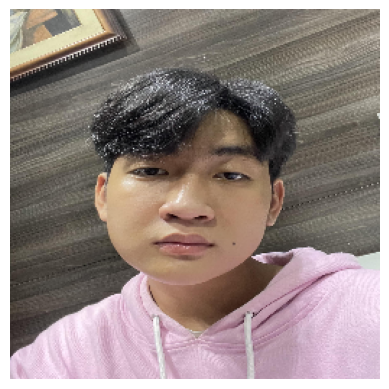

torch.Size([3, 3088, 2316])
torch.Size([3, 256, 256])


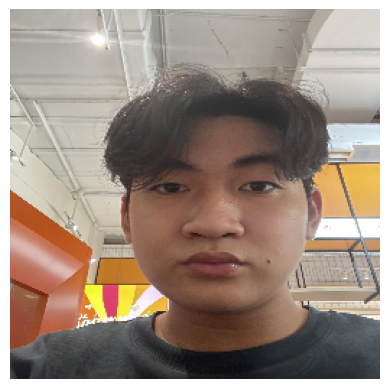

torch.Size([3, 3088, 2316])
torch.Size([3, 256, 256])


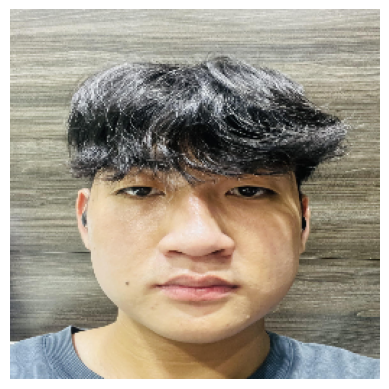

torch.Size([3, 3, 256, 256])

In [20]:
resize_transform = transforms.Resize((256, 256))

align_input_images = []
for input_name in sorted(os.listdir(input_dir)):
    image_path = os.path.join(input_dir,input_name)
    input_image = torchvision.io.read_image(image_path)
    print(input_image.shape)
    align_input_image = resize_transform(input_image)
    print(align_input_image.shape)
    
    plt.imshow(align_input_image.permute(1,2,0))
    plt.axis('off')
    plt.show()
    
    align_input_images.append(align_input_image)

align_input_images = torch.stack(align_input_images)
align_input_images.shape

In [13]:
result_e4e_dir = "/kaggle/input/e4e-evaluation-dataset/results_eval"
result_image = torchvision.io.read_image(os.path.join(result_e4e_dir,"result_IMG_0127.jpeg_05109.jpg_18067.jpg.jpg"))
result_image.shape

torch.Size([3, 1024, 1024])

torch.Size([3, 1024, 1024])
torch.Size([3, 256, 256])


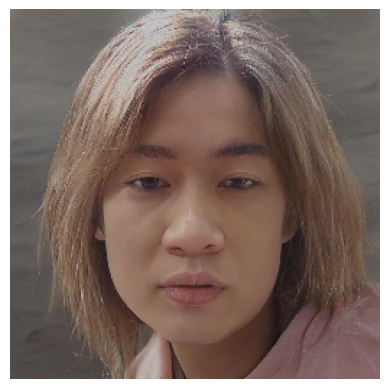

torch.Size([3, 1024, 1024])
torch.Size([3, 256, 256])


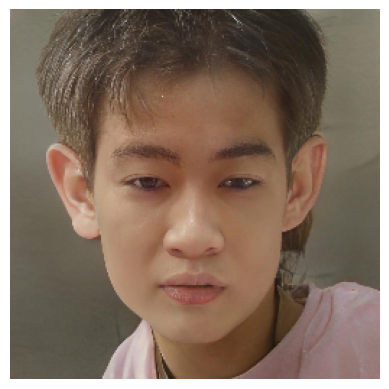

torch.Size([3, 1024, 1024])
torch.Size([3, 256, 256])


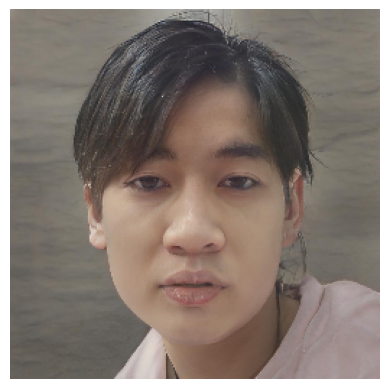

torch.Size([3, 1024, 1024])
torch.Size([3, 256, 256])


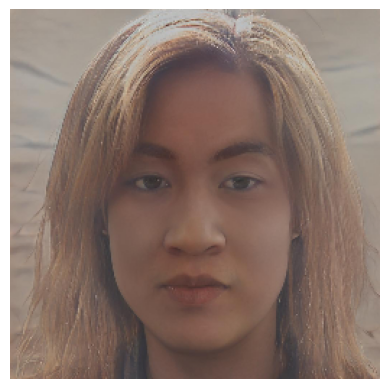

torch.Size([3, 1024, 1024])
torch.Size([3, 256, 256])


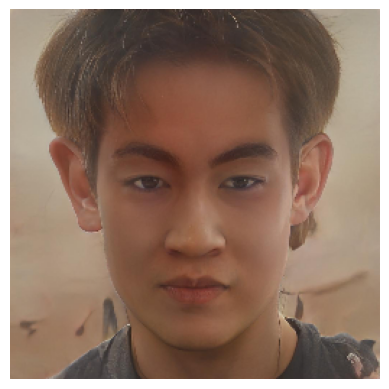

torch.Size([3, 1024, 1024])
torch.Size([3, 256, 256])


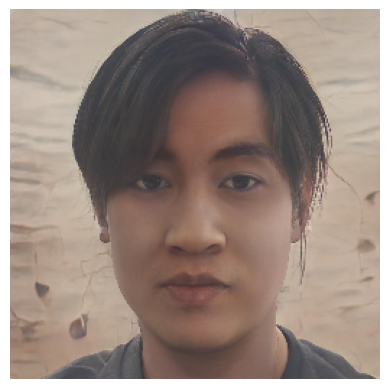

torch.Size([3, 1024, 1024])
torch.Size([3, 256, 256])


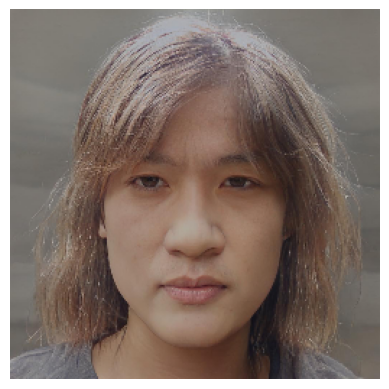

torch.Size([3, 1024, 1024])
torch.Size([3, 256, 256])


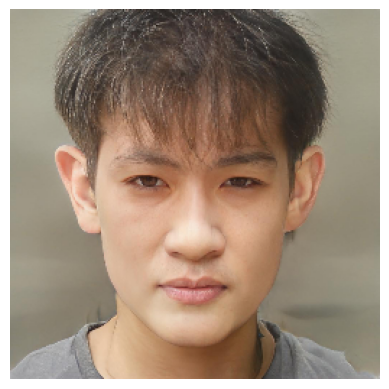

torch.Size([3, 1024, 1024])
torch.Size([3, 256, 256])


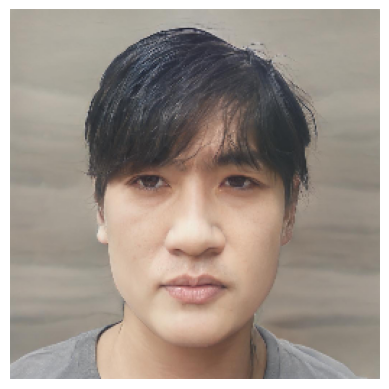

torch.Size([9, 3, 256, 256])

In [26]:
resize_transform = transforms.Resize((256, 256))

align_result_images = []
for image_name in sorted(os.listdir(result_e4e_dir)):
    image_path = os.path.join(result_e4e_dir,image_name)
    result_image = torchvision.io.read_image(image_path)
    print(result_image.shape)
    align_result_image = resize_transform(result_image)
    print(align_result_image.shape)
    
    plt.imshow(align_result_image.permute(1,2,0))
    plt.axis('off')
    plt.show()
    
    align_result_images.append(align_result_image)

align_result_images = torch.stack(align_result_images)
align_result_images.shape

In [27]:
real_data = [align_input_images, hairstyle_images, color_images]
real_data = torch.cat(real_data)
real_data.shape

torch.Size([9, 3, 256, 256])

In [28]:
torch.manual_seed(123)
fid = FrechetInceptionDistance()

fid.update(real_data, real=True)
fid.update(align_result_images, real=False)
fid.compute()

tensor(258.4289)

## fs

In [29]:
result_fs_dir = "/kaggle/input/fs-evaluation-dataset/results_eval"
result_image = torchvision.io.read_image(os.path.join(result_fs_dir,"result_IMG_0127.jpeg_05109.jpg_18067.jpg.jpg"))
result_image.shape

torch.Size([3, 1024, 1024])

torch.Size([3, 1024, 1024])
torch.Size([3, 256, 256])


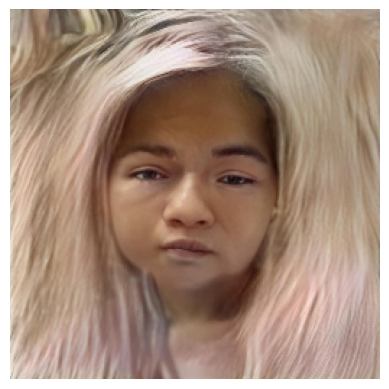

torch.Size([3, 1024, 1024])
torch.Size([3, 256, 256])


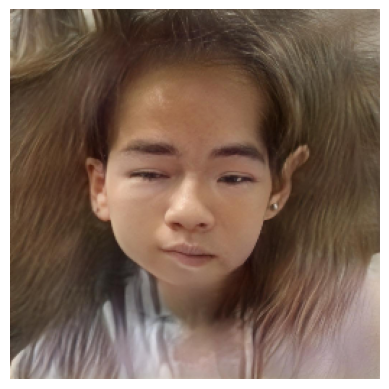

torch.Size([3, 1024, 1024])
torch.Size([3, 256, 256])


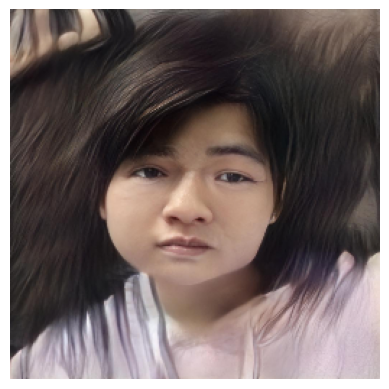

torch.Size([3, 1024, 1024])
torch.Size([3, 256, 256])


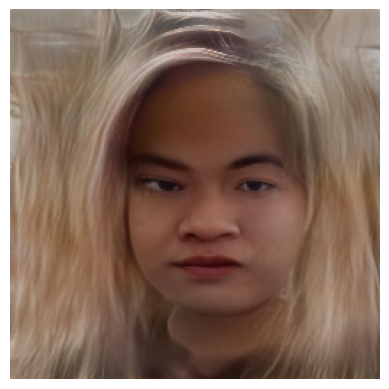

torch.Size([3, 1024, 1024])
torch.Size([3, 256, 256])


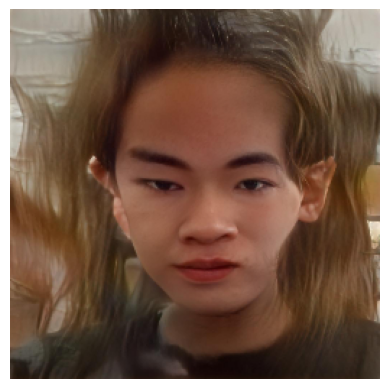

torch.Size([3, 1024, 1024])
torch.Size([3, 256, 256])


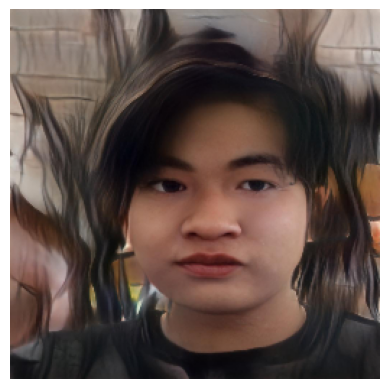

torch.Size([3, 1024, 1024])
torch.Size([3, 256, 256])


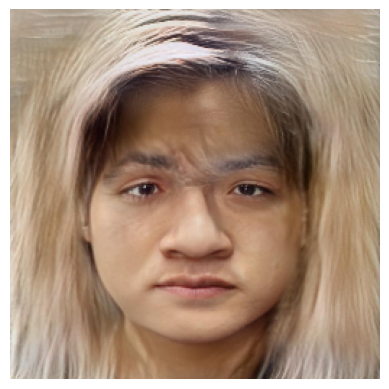

torch.Size([3, 1024, 1024])
torch.Size([3, 256, 256])


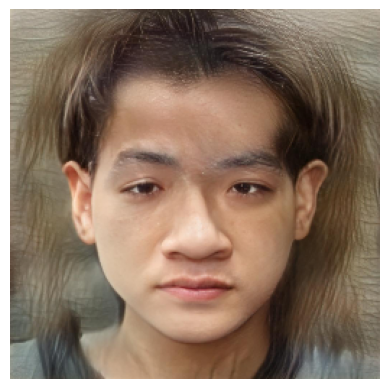

torch.Size([3, 1024, 1024])
torch.Size([3, 256, 256])


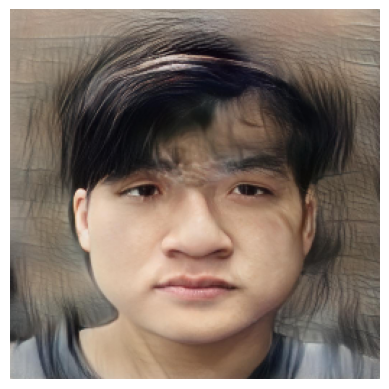

torch.Size([9, 3, 256, 256])

In [30]:
resize_transform = transforms.Resize((256, 256))

align_result_images = []
for image_name in sorted(os.listdir(result_fs_dir)):
    image_path = os.path.join(result_fs_dir,image_name)
    result_image = torchvision.io.read_image(image_path)
    print(result_image.shape)
    align_result_image = resize_transform(result_image)
    print(align_result_image.shape)
    
    plt.imshow(align_result_image.permute(1,2,0))
    plt.axis('off')
    plt.show()
    
    align_result_images.append(align_result_image)

align_result_images = torch.stack(align_result_images)
align_result_images.shape

In [31]:
torch.manual_seed(123)
fid = FrechetInceptionDistance()

fid.update(real_data, real=True)
fid.update(align_result_images, real=False)
fid.compute()

tensor(282.8719)

# Hairfastgan

In [32]:
result_hfgan_dir = "/kaggle/input/hairfastgan-evaluation-dataset/results_eval"
result_image = torchvision.io.read_image(os.path.join(result_hfgan_dir,"result_IMG_0127.jpeg_05109.jpg_18067.jpg.jpg"))
result_image.shape

torch.Size([3, 1024, 1024])

torch.Size([3, 1024, 1024])
torch.Size([3, 256, 256])


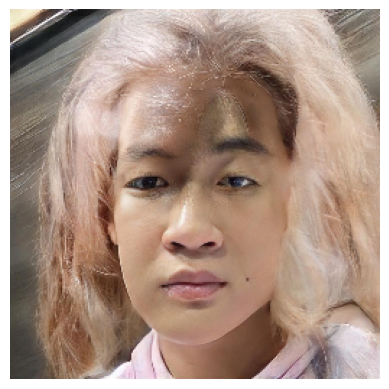

torch.Size([3, 1024, 1024])
torch.Size([3, 256, 256])


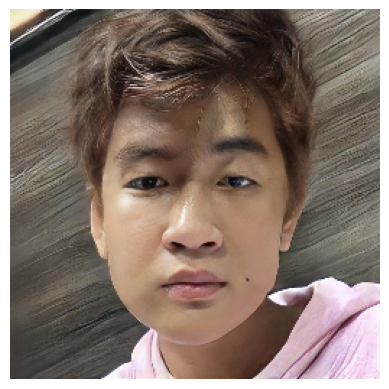

torch.Size([3, 1024, 1024])
torch.Size([3, 256, 256])


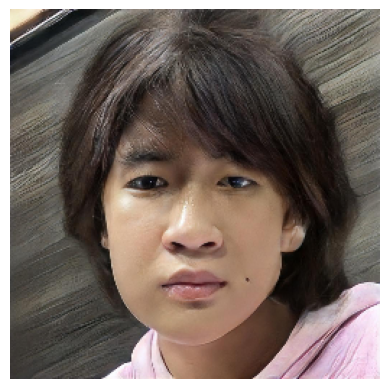

torch.Size([3, 1024, 1024])
torch.Size([3, 256, 256])


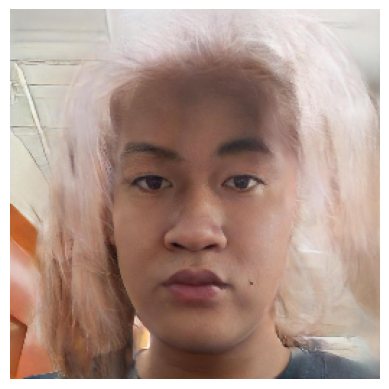

torch.Size([3, 1024, 1024])
torch.Size([3, 256, 256])


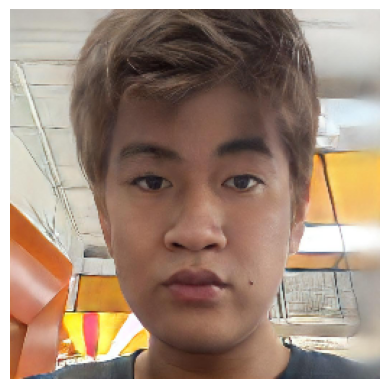

torch.Size([3, 1024, 1024])
torch.Size([3, 256, 256])


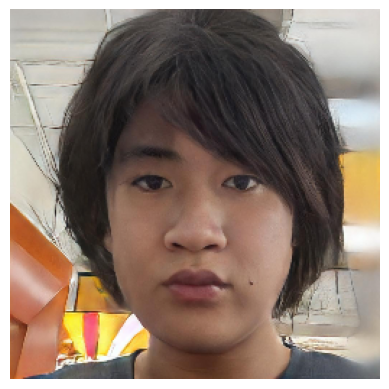

torch.Size([3, 1024, 1024])
torch.Size([3, 256, 256])


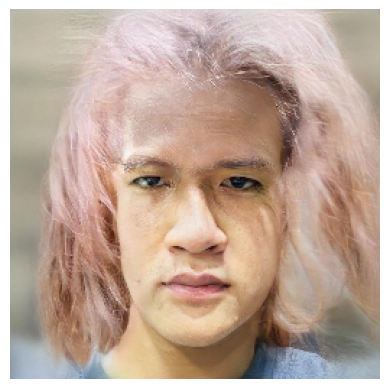

torch.Size([3, 1024, 1024])
torch.Size([3, 256, 256])


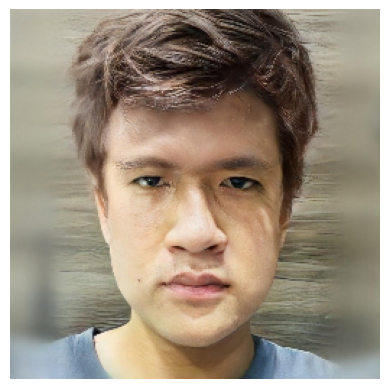

torch.Size([3, 1024, 1024])
torch.Size([3, 256, 256])


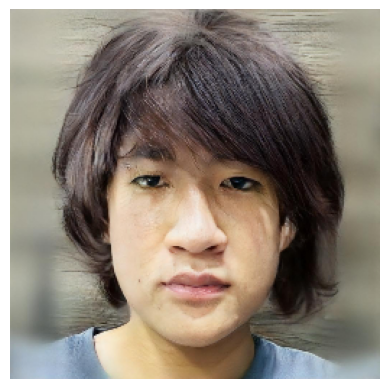

torch.Size([9, 3, 256, 256])

In [35]:
resize_transform = transforms.Resize((256, 256))

align_result_images = []
for image_name in sorted(os.listdir(result_hfgan_dir)):
    image_path = os.path.join(result_hfgan_dir,image_name)
    result_image = torchvision.io.read_image(image_path)
    print(result_image.shape)
    align_result_image = resize_transform(result_image)
    print(align_result_image.shape)
    
    plt.imshow(align_result_image.permute(1,2,0))
    plt.axis('off')
    plt.show()
    
    align_result_images.append(align_result_image)

align_result_images = torch.stack(align_result_images)
align_result_images.shape

In [36]:
torch.manual_seed(123)
fid = FrechetInceptionDistance()

fid.update(real_data, real=True)
fid.update(align_result_images, real=False)
fid.compute()

tensor(243.5175)

# ID face

In [104]:
from collections import namedtuple
import torch
from torch.nn import Conv2d, BatchNorm2d, PReLU, ReLU, Sigmoid, MaxPool2d, AdaptiveAvgPool2d, Sequential, Module



class Flatten(Module):
	def forward(self, input):
		return input.view(input.size(0), -1)


def l2_norm(input, axis=1):
	norm = torch.norm(input, 2, axis, True)
	output = torch.div(input, norm)
	return output


class Bottleneck(namedtuple('Block', ['in_channel', 'depth', 'stride'])):
	""" A named tuple describing a ResNet block. """


def get_block(in_channel, depth, num_units, stride=2):
	return [Bottleneck(in_channel, depth, stride)] + [Bottleneck(depth, depth, 1) for i in range(num_units - 1)]


def get_blocks(num_layers):
	if num_layers == 50:
		blocks = [
			get_block(in_channel=64, depth=64, num_units=3),
			get_block(in_channel=64, depth=128, num_units=4),
			get_block(in_channel=128, depth=256, num_units=14),
			get_block(in_channel=256, depth=512, num_units=3)
		]
	elif num_layers == 100:
		blocks = [
			get_block(in_channel=64, depth=64, num_units=3),
			get_block(in_channel=64, depth=128, num_units=13),
			get_block(in_channel=128, depth=256, num_units=30),
			get_block(in_channel=256, depth=512, num_units=3)
		]
	elif num_layers == 152:
		blocks = [
			get_block(in_channel=64, depth=64, num_units=3),
			get_block(in_channel=64, depth=128, num_units=8),
			get_block(in_channel=128, depth=256, num_units=36),
			get_block(in_channel=256, depth=512, num_units=3)
		]
	else:
		raise ValueError("Invalid number of layers: {}. Must be one of [50, 100, 152]".format(num_layers))
	return blocks


class SEModule(Module):
	def __init__(self, channels, reduction):
		super(SEModule, self).__init__()
		self.avg_pool = AdaptiveAvgPool2d(1)
		self.fc1 = Conv2d(channels, channels // reduction, kernel_size=1, padding=0, bias=False)
		self.relu = ReLU(inplace=True)
		self.fc2 = Conv2d(channels // reduction, channels, kernel_size=1, padding=0, bias=False)
		self.sigmoid = Sigmoid()

	def forward(self, x):
		module_input = x
		x = self.avg_pool(x)
		x = self.fc1(x)
		x = self.relu(x)
		x = self.fc2(x)
		x = self.sigmoid(x)
		return module_input * x


class bottleneck_IR(Module):
	def __init__(self, in_channel, depth, stride):
		super(bottleneck_IR, self).__init__()
		if in_channel == depth:
			self.shortcut_layer = MaxPool2d(1, stride)
		else:
			self.shortcut_layer = Sequential(
				Conv2d(in_channel, depth, (1, 1), stride, bias=False),
				BatchNorm2d(depth)
			)
		self.res_layer = Sequential(
			BatchNorm2d(in_channel),
			Conv2d(in_channel, depth, (3, 3), (1, 1), 1, bias=False), PReLU(depth),
			Conv2d(depth, depth, (3, 3), stride, 1, bias=False), BatchNorm2d(depth)
		)

	def forward(self, x):
		shortcut = self.shortcut_layer(x)
		res = self.res_layer(x)
		return res + shortcut


class bottleneck_IR_SE(Module):
	def __init__(self, in_channel, depth, stride):
		super(bottleneck_IR_SE, self).__init__()
		if in_channel == depth:
			self.shortcut_layer = MaxPool2d(1, stride)
		else:
			self.shortcut_layer = Sequential(
				Conv2d(in_channel, depth, (1, 1), stride, bias=False),
				BatchNorm2d(depth)
			)
		self.res_layer = Sequential(
			BatchNorm2d(in_channel),
			Conv2d(in_channel, depth, (3, 3), (1, 1), 1, bias=False),
			PReLU(depth),
			Conv2d(depth, depth, (3, 3), stride, 1, bias=False),
			BatchNorm2d(depth),
			SEModule(depth, 16)
		)

	def forward(self, x):
		shortcut = self.shortcut_layer(x)
		res = self.res_layer(x)
		return res + shortcut


In [105]:
from torch.nn import Linear, Conv2d, BatchNorm1d, BatchNorm2d, PReLU, Dropout, Sequential, Module

class Backbone(Module):
	def __init__(self, input_size, num_layers, mode='ir', drop_ratio=0.4, affine=True):
		super(Backbone, self).__init__()
		assert input_size in [112, 224], "input_size should be 112 or 224"
		assert num_layers in [50, 100, 152], "num_layers should be 50, 100 or 152"
		assert mode in ['ir', 'ir_se'], "mode should be ir or ir_se"
		blocks = get_blocks(num_layers)
		if mode == 'ir':
			unit_module = bottleneck_IR
		elif mode == 'ir_se':
			unit_module = bottleneck_IR_SE
		self.input_layer = Sequential(Conv2d(3, 64, (3, 3), 1, 1, bias=False),
									  BatchNorm2d(64),
									  PReLU(64))
		if input_size == 112:
			self.output_layer = Sequential(BatchNorm2d(512),
			                               Dropout(drop_ratio),
			                               Flatten(),
			                               Linear(512 * 7 * 7, 512),
			                               BatchNorm1d(512, affine=affine))
		else:
			self.output_layer = Sequential(BatchNorm2d(512),
			                               Dropout(drop_ratio),
			                               Flatten(),
			                               Linear(512 * 14 * 14, 512),
			                               BatchNorm1d(512, affine=affine))

		modules = []
		for block in blocks:
			for bottleneck in block:
				modules.append(unit_module(bottleneck.in_channel,
										   bottleneck.depth,
										   bottleneck.stride))
		self.body = Sequential(*modules)

	def forward(self, x):
		x = self.input_layer(x)
		x = self.body(x)
		x = self.output_layer(x)
		return l2_norm(x)


def IR_50(input_size):
	"""Constructs a ir-50 model."""
	model = Backbone(input_size, num_layers=50, mode='ir', drop_ratio=0.4, affine=False)
	return model


def IR_101(input_size):
	"""Constructs a ir-101 model."""
	model = Backbone(input_size, num_layers=100, mode='ir', drop_ratio=0.4, affine=False)
	return model


def IR_152(input_size):
	"""Constructs a ir-152 model."""
	model = Backbone(input_size, num_layers=152, mode='ir', drop_ratio=0.4, affine=False)
	return model


def IR_SE_50(input_size):
	"""Constructs a ir_se-50 model."""
	model = Backbone(input_size, num_layers=50, mode='ir_se', drop_ratio=0.4, affine=False)
	return model


def IR_SE_101(input_size):
	"""Constructs a ir_se-101 model."""
	model = Backbone(input_size, num_layers=100, mode='ir_se', drop_ratio=0.4, affine=False)
	return model

In [115]:
class IDLoss(nn.Module):
    def __init__(self):
        super(IDLoss, self).__init__()
        print('Loading ResNet ArcFace for ID Loss')
        self.facenet = Backbone(input_size=112, num_layers=50, drop_ratio=0.6, mode='ir')
        self.facenet.load_state_dict(torch.load("/kaggle/working/model_ir50.pth"))
        self.pool = torch.nn.AdaptiveAvgPool2d((256, 256))
        self.face_pool = torch.nn.AdaptiveAvgPool2d((112, 112))
        self.facenet.eval()

    def extract_feats(self, x):
        if x.shape[2] != 256:
            x = self.pool(x)
        x = x[:, :, 35:223, 32:220]  # Crop interesting region
        x = self.face_pool(x)
        x_feats = self.facenet(x)
        return x_feats

    def forward(self, y_hat, y):
        n_samples = y.shape[0]
        y_feats = self.extract_feats(y)  # Otherwise use the feature from there
        y_hat_feats = self.extract_feats(y_hat)
        y_feats = y_feats.detach()
        loss = 0
        sim_improvement = 0
        count = 0
        for i in range(n_samples):
            diff_target = y_hat_feats[i].dot(y_feats[i])
            loss += 1 - diff_target
            count += 1

        return loss / count, sim_improvement / count

In [116]:
model = IDLoss()

Loading ResNet ArcFace for ID Loss


## E4e

In [117]:
result_e4e_dir = "/kaggle/input/e4e-evaluation-dataset/results_eval"
result_image = torchvision.io.read_image(os.path.join(result_e4e_dir,"result_IMG_0127.jpeg_05109.jpg_18067.jpg.jpg"))
result_image.shape

torch.Size([3, 1024, 1024])

In [119]:
# Write a custom dataset class (inherits from torch.utils.data.Dataset)
from torch.utils.data import Dataset

# 1. Subclass torch.utils.data.Dataset
class ImageFolderCustom(Dataset):
    
    def __init__(self, input_dir_path, result_dir_path):
        
        self.input_dir_path = input_dir_path
        self.result_dir_path = result_dir_path
        self.input_dir = sorted(os.listdir(input_dir_path))
        self.result_dir = sorted(os.listdir(result_dir_path))
        self.transform = transforms.Resize((256, 256))
    
    def __len__(self) -> int:
        "Returns the total number of samples."
        return len(self.result_dir)
    
    def __getitem__(self, index: int):
        result_name = self.result_dir[index]
        result_image_path = os.path.join(self.result_dir_path, result_name)
        result_image = torchvision.io.read_image(result_image_path)
        align_result_image = self.transform(result_image)
        
        components = result_name.split('_')
        target_name = components[1]+ '_' + components[2]
        target_image_path = os.path.join(self.input_dir_path, target_name)
        target_image = torchvision.io.read_image(target_image_path)
        align_target_image = self.transform(target_image)
        
        return align_result_image, align_target_image

In [120]:
result_e4e_dir = "/kaggle/input/e4e-evaluation-dataset/results_eval"
input_dir = "/kaggle/input/e4e-evaluation-dataset/correct_image_eval"

In [121]:
e4e_dataset = ImageFolderCustom(input_dir, result_e4e_dir)

In [122]:
from torch.utils.data import DataLoader

# Setup the batch size hyperparameter
BATCH_SIZE = 9

# Turn datasets into iterables (batches)
dataloader = DataLoader(
    e4e_dataset, # dataset to turn into iterable
    batch_size=BATCH_SIZE, # how many samples per batch? 
)

# Let's check out what we've created
print(f"Dataloaders: {dataloader}") 
print(f"Length of training dataset: {len(dataloader.dataset)}")
print(f"Length of train dataloader: {len(dataloader)} batches of {BATCH_SIZE}")

Dataloaders: <torch.utils.data.dataloader.DataLoader object at 0x7f52a1963f10>
Length of training dataset: 9
Length of train dataloader: 1 batches of 9


In [123]:
X, y = next(iter(dataloader))
X.shape, y.shape

(torch.Size([9, 3, 256, 256]), torch.Size([9, 3, 256, 256]))

In [124]:
model = IDLoss().to('cuda').eval()
loss ,_ = model(X.cuda().float(),y.cuda().float())
loss.item()

Loading ResNet ArcFace for ID Loss


0.627899706363678

## FS

In [125]:
result_fs_dir = "/kaggle/input/fs-evaluation-dataset/results_eval"
input_dir = "/kaggle/input/e4e-evaluation-dataset/correct_image_eval"

In [126]:
fs_dataset = ImageFolderCustom(input_dir, result_fs_dir)

In [127]:
from torch.utils.data import DataLoader

# Setup the batch size hyperparameter
BATCH_SIZE = 9

# Turn datasets into iterables (batches)
dataloader = DataLoader(
    fs_dataset, # dataset to turn into iterable
    batch_size=BATCH_SIZE, # how many samples per batch? 
)

# Let's check out what we've created
print(f"Dataloaders: {dataloader}") 
print(f"Length of training dataset: {len(dataloader.dataset)}")
print(f"Length of train dataloader: {len(dataloader)} batches of {BATCH_SIZE}")

Dataloaders: <torch.utils.data.dataloader.DataLoader object at 0x7f52a129a650>
Length of training dataset: 9
Length of train dataloader: 1 batches of 9


In [128]:
X, y = next(iter(dataloader))
X.shape, y.shape

(torch.Size([9, 3, 256, 256]), torch.Size([9, 3, 256, 256]))

In [129]:
model = IDLoss().to('cuda').eval()
loss ,_ = model(X.cuda().float(),y.cuda().float())
loss.item()

Loading ResNet ArcFace for ID Loss


0.5960742831230164

## Hairfastgan

In [130]:
result_hfgan_dir = "/kaggle/input/hairfastgan-evaluation-dataset/results_eval"
input_dir = "/kaggle/input/e4e-evaluation-dataset/correct_image_eval"

In [131]:
hfgan_dataset = ImageFolderCustom(input_dir, result_hfgan_dir)

In [132]:
from torch.utils.data import DataLoader

# Setup the batch size hyperparameter
BATCH_SIZE = 9

# Turn datasets into iterables (batches)
dataloader = DataLoader(
    hfgan_dataset, # dataset to turn into iterable
    batch_size=BATCH_SIZE, # how many samples per batch? 
)

# Let's check out what we've created
print(f"Dataloaders: {dataloader}") 
print(f"Length of training dataset: {len(dataloader.dataset)}")
print(f"Length of train dataloader: {len(dataloader)} batches of {BATCH_SIZE}")

Dataloaders: <torch.utils.data.dataloader.DataLoader object at 0x7f52aab163b0>
Length of training dataset: 9
Length of train dataloader: 1 batches of 9


In [133]:
X, y = next(iter(dataloader))
X.shape, y.shape

(torch.Size([9, 3, 256, 256]), torch.Size([9, 3, 256, 256]))

In [134]:
model = IDLoss().to('cuda').eval()
loss ,_ = model(X.cuda().float(),y.cuda().float())
loss.item()

Loading ResNet ArcFace for ID Loss


0.6052238941192627